In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from DomainPrediction import BaseProtein
from DomainPrediction.protein.base import FoldedProtein
from DomainPrediction.utils import helper
from DomainPrediction.eval import metrics
from DomainPrediction.utils.hmmtools import HmmerTools
from DomainPrediction.utils.tmalign import TMalign

In [4]:
root = '../..'
data_path = os.path.join(root, 'Data/round_1_exp')

In [5]:
file = os.path.join(data_path, 'order-ESM3.fasta')
esm3_sequences = helper.read_fasta(file)

In [6]:
file = os.path.join(data_path, 'order-MPNN.fasta')
mpnn_sequences = helper.read_fasta(file)

In [7]:
str(mpnn_sequences[0].seq)

'APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHPTLSVLAQSLVPHREISVPDNGITADTTVLTPAMLPLIDLT'

In [8]:
_T = [i for i in range(16,86)]

In [9]:
''.join([str(mpnn_sequences[0].seq)[i] for i in _T]) ## wt T domain

'GEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHPTLSVLAQSLVP'

In [ ]:
mpnn_sequences

In [20]:
p_esm = [15, 51, 2, 17]
p_mpnn = [38, 0, 0, 11, 0, 0, 3, 0] # index 0 wt

In [18]:
## Compute Seq ID after aligning to WT
wt = os.path.join(data_path, 'wt.T.fasta')
gen = os.path.join(data_path, 'order-ESM3.T.fasta')
pfam_T_hmm = os.path.join(root, 'src/DomainPrediction/hmm/PF00550_T.hmm')
seq_ids_esm = metrics.compute_sequence_identity(wt, gen, hmm=pfam_T_hmm)

100%|██████████| 4/4 [00:00<00:00, 103.98it/s]


In [19]:
## Compute Seq ID after aligning to WT
wt = os.path.join(data_path, 'wt.T.fasta')
gen = os.path.join(data_path, 'order-MPNN.T.fasta')
pfam_T_hmm = os.path.join(root, 'src/DomainPrediction/hmm/PF00550_T.hmm')
seq_ids_mpnn = metrics.compute_sequence_identity(wt, gen, hmm=pfam_T_hmm)

100%|██████████| 8/8 [00:00<00:00, 67.79it/s]


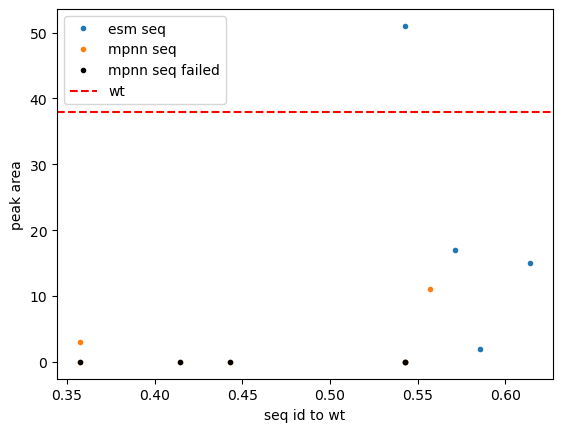

In [35]:
fig, ax = plt.subplots(1, 1)

_ = ax.plot(seq_ids_esm, p_esm, '.' , label='esm seq')
_ = ax.plot(seq_ids_mpnn[1:], p_mpnn[1:], '.' , label='mpnn seq')
_ = ax.plot(np.array(seq_ids_mpnn[1:])[np.array(p_mpnn[1:]) == 0], 
            np.array(p_mpnn[1:])[np.array(p_mpnn[1:]) == 0], '.' , label='mpnn seq failed', color='black')
_ = ax.set_ylabel('peak area')
_ = ax.set_xlabel('seq id to wt')
_ = ax.axhline(y=p_mpnn[0], linestyle='--', color='red', label='wt')
_ = ax.legend()

In [43]:
file = os.path.join(data_path, '../gxps/GxpS_ATC.fasta')
wt_seq = helper.read_fasta(file, mode='str')[0]

In [44]:
wt_seq

'VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIALGVAPDQRVAICVTRSLARIIGLLAVLKAGGAYVPLDPAYPGERLAYMLTDATPVILMADNVGRAALSEDILATLTVLDPNTLLEQPDHNPQVSGLTPQHLAYVIYTSGSTGRPKGVMIEHRSVVNLTLTQITQFDVCATSRMLQFASFGFDASVWEIMMALSCGAMLVIPTETVRQDPQRLWRYLEEQAITHACLTPAMFHDGTDLPAIAIKPTLIFAGEAPSPALFQALCSRADLFNAYGPTEITVCATTWDCPADYTGGVIPIGSPVANKRLYLLDEHRQPVPLGTVGELYIGGVGVARGYLNRPELTAERFLNDPFSDETNARMYRAGDLARYLPDGNLVFVGRNDQQVKIRGFRIEPGEIEARLVEHSEVSEALVLALGDGQDKRLVAYVVALADDGLATKLREHLSDILPDYMIPAAFVRLDAFPLTPNGKLDRRSLPAPGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHPTLSVLAQSLVPHREISVPDNGITADTTVLTPAMLPLIDLTQAEIDRIVEQVPGGIANIQDIYALSPLQDGILFHHLLANEGDPYLLITQQAFADRPLLNRYLAAVQQVVDRHDILRTAFIWEGLSVPAQVICRQAPLSVTELTLNPADGAISNQLAQRFDPRRHRIDLNQAPLLRFVVAQESDGRWILLQLLHHLIGDHTTLEVMNSEVQACLLGQMDSLPAPVPFRHLVAQARQGVSQAEHTRFFTDMLAEVDEPTLLFGLAEAHHDGSQVTESHRMLTAGLNERLRGQARRLGVSVAALCHLAWAQVLSRTSGQTQVVFGTVLFGRMQAGEGSDSGMGLFINTLPLRLDIDNTPVRDSVRAAHSRLAGLLEHEHASLALAQRCSGVESGTPLFNALLNYRHNTQPVTPDEIVSGIEFLGAQERTNYPFVLSVE

In [45]:
## for gxps seq reconstruction
p1 = "VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIALGVAPDQRVAICVTRSLARIIGLLAVLKAGGAYVPLDPAYPGERLAYMLTDATPVILMADNVGRAALSEDILATLTVLDPNTLLEQPDHNPQVSGLTPQHLAYVIYTSGSTGRPKGVMIEHRSVVNLTLTQITQFDVCATSRMLQFASFGFDASVWEIMMALSCGAMLVIPTETVRQDPQRLWRYLEEQAITHACLTPAMFHDGTDLPAIAIKPTLIFAGEAPSPALFQALCSRADLFNAYGPTEITVCATTWDCPADYTGGVIPIGSPVANKRLYLLDEHRQPVPLGTVGELYIGGVGVARGYLNRPELTAERFLNDPFSDETNARMYRAGDLARYLPDGNLVFVGRNDQQVKIRGFRIEPGEIEARLVEHSEVSEALVLALGDGQDKRLVAYVVALADDGLATKLREHLSDILPDYMIPAAFVRLDAFPLTPNGKLDRRSLP"
p2 = "QAEIDRIVEQVPGGIANIQDIYALSPLQDGILFHHLLANEGDPYLLITQQAFADRPLLNRYLAAVQQVVDRHDILRTAFIWEGLSVPAQVICRQAPLSVTELTLNPADGAISNQLAQRFDPRRHRIDLNQAPLLRFVVAQESDGRWILLQLLHHLIGDHTTLEVMNSEVQACLLGQMDSLPAPVPFRHLVAQARQGVSQAEHTRFFTDMLAEVDEPTLLFGLAEAHHDGSQVTESHRMLTAGLNERLRGQARRLGVSVAALCHLAWAQVLSRTSGQTQVVFGTVLFGRMQAGEGSDSGMGLFINTLPLRLDIDNTPVRDSVRAAHSRLAGLLEHEHASLALAQRCSGVESGTPLFNALLNYRHNTQPVTPDEIVSGIEFLGAQERTNYPFVLSVEDSGSDLGLTAQVVQPFDPERICGYMQQALASLVQA"

In [51]:
## sanity check
p1 + str(mpnn_sequences[0].seq) + p2 == wt_seq

True

In [52]:
perplexity_esm = [4.7126094786554615, 4.715030882105868, 4.80126990297997, 4.732323139735392]
perplexity_mpnn = [4.775636840608922, 4.938643533029845, 5.125264247300774, 4.92685595821353, 4.972566868715928, 5.084737770280967, 4.849960106760199, 5.097950654642166]

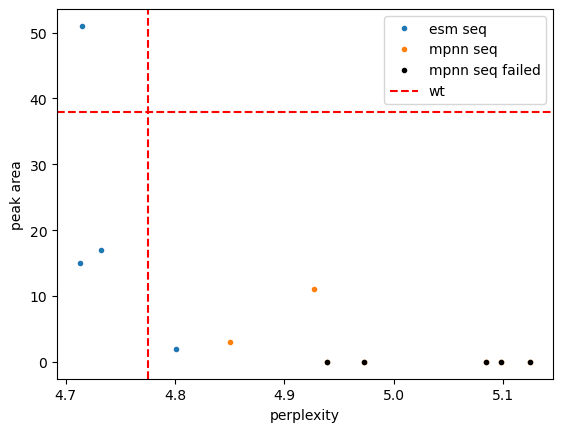

In [54]:
fig, ax = plt.subplots(1, 1)

_ = ax.plot(perplexity_esm, p_esm, '.' , label='esm seq')
_ = ax.plot(perplexity_mpnn[1:], p_mpnn[1:], '.' , label='mpnn seq')
_ = ax.plot(np.array(perplexity_mpnn[1:])[np.array(p_mpnn[1:]) == 0], 
            np.array(p_mpnn[1:])[np.array(p_mpnn[1:]) == 0], '.' , label='mpnn seq failed', color='black')
_ = ax.set_ylabel('peak area')
_ = ax.set_xlabel('perplexity')
_ = ax.axhline(y=p_mpnn[0], linestyle='--', color='red', label='wt')
_ = ax.axvline(x=perplexity_mpnn[0], linestyle='--', color='red')
_ = ax.legend()